<a href="https://colab.research.google.com/github/bcaffo/ds4bme_intro/blob/master/notebooks/multivariable_nn_in_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an extension of using pytorch to perform a simple neural network. Note since this dataset is really small. I'm not splitting into a testing and training sets.

In [7]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Read in the data
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")

def normalize(x):
  return (x - np.mean(x)) / np.std(x)

## Create x variables that are normalized
dat = dat.assign(
    y = dat.PD,
    x1 = normalize(dat.FLAIR),
    x2 = normalize(dat.T1), 
    x3 = normalize(dat.T2),
    x4 = normalize(dat.FLAIR_10),
    x5 = normalize(dat.T1_10),
    x6 = normalize(dat.T2_10))
dat = dat.filter(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], axis = 1)
dat.head()

,y,x1,x2,x3,x4,x5,x6
0,1.586219,-0.841279,-0.904128,1.466353,0.556695,-0.569218,1.921010
1,1.766672,-0.049795,-1.501128,0.534121,1.403361,-1.811374,1.800152
2,0.262042,-1.008629,-0.981815,-0.746050,-1.252711,-0.519458,-1.307041
3,0.011104,-1.006151,-1.471756,-1.284565,-1.138899,-1.733044,-1.174082
4,1.730152,-0.161726,-0.984970,0.958099,1.234082,-0.858639,1.184153


In [8]:
y = dat.y
x = dat.drop('y', axis = 1)

## I find it easier to convert to np arrays before torch tensors
y = pd.DataFrame.to_numpy(y)
x = pd.DataFrame.to_numpy(x)

## This will give you a sense of the
## in sample prediction using just a linear model
#reg = LinearRegression().fit(x, y)
#yhat = reg.predict(x)
#plt.plot(y, yhat, ".")

## have to switch floating point precision for torch
xtraining = torch.from_numpy(x).float()
ytraining = torch.from_numpy(y).float()

In [10]:
n = x.shape[0]
p = x.shape[1]

## Show that everything is the right size
print([xtraining.shape, ytraining.shape, [n, p]])

[torch.Size([100, 6]), torch.Size([100]), [100, 6]]


In [11]:
## Two layers
model = torch.nn.Sequential(
    torch.nn.Linear(p,3),
    torch.nn.ReLU(),
    torch.nn.Linear(3,1)
)

## MSE is the loss function
loss_fn = torch.nn.MSELoss(reduction='sum')  

## Set the optimizer
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
optimizer = torch.optim.Adam(model.parameters())



In [12]:
## Loop over iterations
for t in range(100000):

  ## Forward propagation
  y_pred = model(xtraining)

  ## the loss for this interation
  loss = loss_fn(y_pred, ytraining)

  ## Zero out the gradients before adding them up 
  optimizer.zero_grad()
  
  ## Backprop
  loss.backward()
  
  ## Optimization step
  optimizer.step()



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


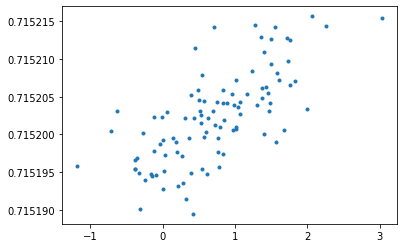

In [13]:
#How are we doing in sample?
yhat = model(xtraining).detach().numpy().reshape(-1)
plt.plot(ytraining, yhat,  ".") 